# Change of Variable formula for One-to-One Transformations

$X$ and $Y$ random variables.

let $ Y = a X$,


$\large F_Y(y) = \bm{P}(Y \leq y) = \bm{P}(a X \leq y) = \bm{P}(X \leq \frac{y}{a}) $

$ \large \Rightarrow F_Y(y) = F_X(\frac{y}{a}) $

Then,

$ \large f_Y(y) = \frac{d}{dy} F_Y(y) = \frac{d}{dy} F_X(\frac{y}{a}) = \large \frac{1}{a} \frac{d}{dy} F_X(y) = \large \frac{1}{a} \frac{d}{dx} F_X(x) $

Therefore:

$\Large f_Y(y) = \frac{1}{a} f_X(x) $

For any monotonic (strictly increasing or decreasing) function $u$ where $Y = u(X)$ and $X in [a, b]$;

let $s(x) = u^{-1}(x)$

The following principal is true:

$\Large f_Y(y) = f_X(s(y)) | \frac{ds}{dy}(y) | ,$ if $u(a) \leq y \leq u(b)$

___________________________

# Probability Integral Transform

### *Check tablet for my notes.*

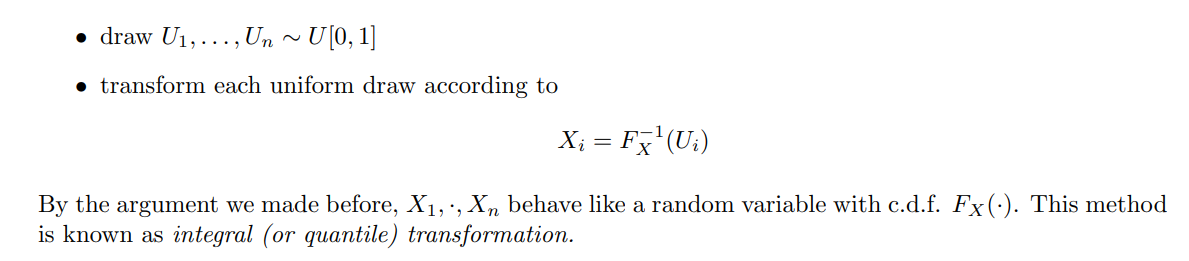

# Copula

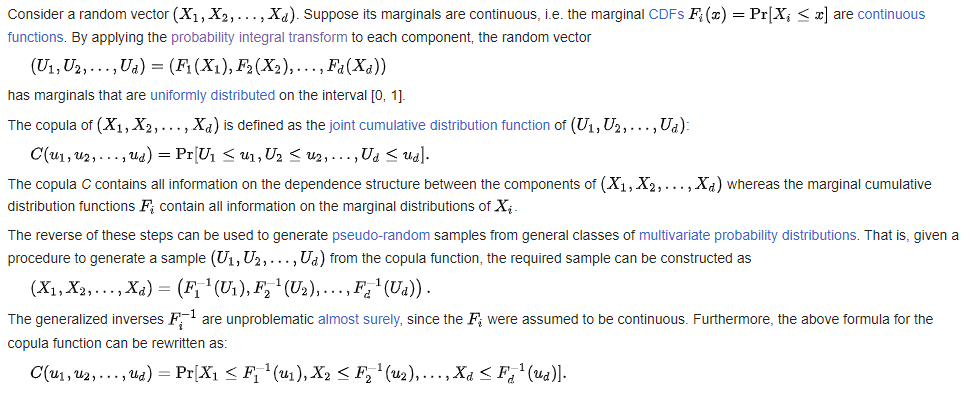

A copula is a function that can take the marginal cumulative function of each random variable as input and generate a **joint cumulative distribution.**

Assuming $X$ and $Y$ are two continuous random variables, the bivariate joint cumulative distribution of $X$ and $Y$ can be written as follows:

$$ H_{X, Y}(x, y) = C(F_X(X), F_Y(Y)) = \bm{P}(X \leq x, Y \leq y) $$

remember that:

$F_X(X)$~$U(0, 1)$

$F_Y(Y)$~$U(0, 1)$

> $H(\cdot)$: joint CDF <br>
> $F(\cdot)$: marginal CDFs <br>
> $C(\cdot)$: Copula function <br>

A copula is a $d$-dimensional joint CDF of a uniform random variables vector $\bm{U} = (U_1, U_2, \cdots, U_d)$ with $ U_i$ ~ $U[0, 1]$ with observations $\bm{u} = (u_1, u_2, \cdots, u_d)$

Here are the propositions that define a copula function:

$ C(u_1, u_2, \cdots, u_d) = \bm{P}(U_1 \leq u_1, U_2 \leq u_2, \cdots, U_d \leq u_d) $

> 1.  $C(\bm{u}) = C(u_1, u_2, \cdots, u_d)$  where $u_i$ is an observation drawn from a uniform marginal distribution.
> 2. $C(u_1, u_2, \cdots, u_d) : [0,1]^d \to [0,1]$. This means $C(u_1, u_2, \cdots, u_d)$ is defined in a $d$-dimensional hypercube space between $0$ and $1$. $C(u_1, u_2, \cdots, u_d)$ maps the $d$-dimensional cubic space to a range between $0$ and $1$.
> 3. $C(u_1, u_2, \cdots, u_{i-1}, 0, u_{i+1}, \cdots, u_d) = 0$ if any component in $C(\cdot)$ is $0$.
> 4. $C(1, 1, \cdots, u_i, \cdots, 1, 1) = u_i$ if all other components except $u_i$ are $1$.
> 5. $C(\cdot)$ must increase or stay the same when any of the components increases. <u> $C(\cdot)$ is a non-decreasing function for each component. </u>
> 6. $C(\cdot)$ must increase or stay the same when all components increase or stay the same (none of them decrease) at the same time. This is also called rectangular inequality or $n$-increasing.

Propositions 1 and 2 tell us that a copula is a joint CDF for uniform standard random variables $U_i$ ~ $U[0, 1]$. Propositions 3–6 are all rules to set up a copula function so that the copula function behaves like a **joint uniform CDF.**

Please read the required reading for uniform distribution to learn more details about this distribution.

Before moving on to the next topic, we would like to introduce another concept: probability integral transformation. 

In [2]:
# Load libraries
import copulae
import matplotlib.pyplot as plt
import pandas as pd
import pycop
from copulae import pseudo_obs
from copulae.archimedean import ClaytonCopula, GumbelCopula
from copulae.elliptical import GaussianCopula, StudentCopula
from copulae.gof.goodness_of_fit import gof_copula
from copulas.multivariate import GaussianMultivariate
from scipy.stats import kendalltau

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

# Import dataset
data_set = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M3/M3. bond_and_stock_data.csv")
data_set.head(5)

,Date,13W_TB,5Y_TBY,10Y_TBY,30Y_TBY,DWJ,Year
0,1/5/2016,0.322581,-0.006340,0.001336,0.007023,0.000567,2016
1,1/6/2016,0.000000,-0.042923,-0.031584,-0.023580,-0.014695,2016
2,1/7/2016,-0.073171,-0.023030,-0.011024,-0.004762,-0.023211,2016
3,1/8/2016,0.000000,-0.021092,-0.010683,-0.002051,-0.010152,2016
4,1/11/2016,-0.078947,-0.001267,0.013146,0.012329,0.003188,2016
